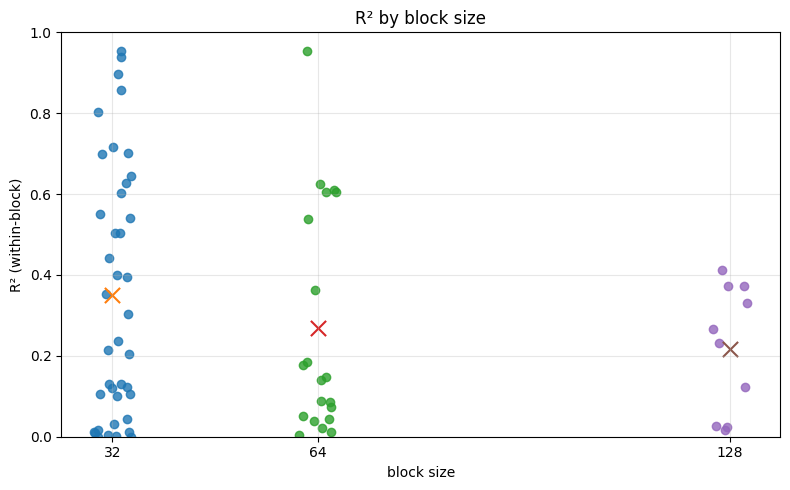

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_r2_jitter(r2_by_block_size, jitter=2.0, show_mean=True, title="R² by block size"):
    """
    r2_by_block_size: dict like {32: [r2_1, r2_2, ...], 64: [...], 128: [...]}
    jitter: max horizontal offset in x-units (e.g., 2.0 means x in [x-2, x+2])
    show_mean: whether to plot the mean R² as a bigger marker per block size
    """
    # Sort settings for consistent x order
    xs = np.array(sorted(r2_by_block_size.keys()), dtype=float)

    plt.figure(figsize=(8, 5))

    for x in xs:
        ys = np.array(r2_by_block_size[int(x)], dtype=float)
        if ys.size == 0:
            continue

        # symmetric uniform jitter around the category x
        xj = x + np.random.uniform(-jitter, jitter, size=ys.size)

        plt.scatter(xj, ys, alpha=0.8)

        if show_mean:
            plt.scatter([x], [ys.mean()], marker="x", s=120)  # mean marker

    plt.xticks(xs, [str(int(v)) for v in xs])
    plt.xlabel("block size")
    plt.ylabel("R² (within-block)")
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.ylim(0, 1)  # R² usually in [0,1] for good fits; adjust if needed
    plt.tight_layout()
    plt.show()


# ---------------- Example usage ----------------
r2_by_block_size = {
    32:  [0.954346,0.010460,0.550468,0.302742,0.237335,0.858068,0.000001,0.626349,0.009224,0.129579,0.539643,0.123065,0.701590,0.130902,0.042743,0.441679,0.351778,0.120761,0.105959,0.504683,0.400307,0.003146,0.645054,0.700363,0.105244,0.100077,0.001567,0.032659,0.016461,0.897215,0.937944,0.716406,0.602217,0.000044,0.205613,0.215027,0.395682,0.801970,0.011933,0.504162],
    64:  [0.140419,0.022226,0.011696,0.363249,0.605888,0.003408,0.039271,0.043517,0.538382,0.088305,0.177139,0.086114,0.610817,0.625794,0.185128,0.073574,0.604250,0.148246,0.050501,0.954289],
    128: [0.025138,0.016707,0.025282,0.265318,0.371746,0.372074,0.411365,0.122491,0.331768,0.232702],
}

plot_r2_jitter(r2_by_block_size, jitter=3, show_mean=True)